In [134]:
import numpy as np
import matplotlib.pyplot as plt

# HW5: statistical inference

## instructions

our course will be using an automatic grading system. <br>
after each question there will appear a code block with some prepared code to add your answer to a dictionary that will be sent to the course server for grading. <br>
please do not edit any code other than in placeholders marked `#### your code here ####` <br>
__don't forget to run the code block after you write your answer.__


you can add code blocks wherever you want in order to interact with datasets and play with your own code. <br>
in the next code block plase fill in your id number and email account in the appropriate placees. <br>
and __don't forget to run the block!__

In [1]:
ans = {}
ans['HW'] = 'HW5'
ans['id_number'] = 307923383

## CLT, LLN

In addition to the CLT which we learned in class, a simpler important law is the Law of Large Numbers (LLN): If $X_1,X_2,...$ are independent and identically distributed with mean $\mu$ and variance $\sigma^2$, then

$\bar{X}_n \longrightarrow_{n \rightarrow \infty} \mu$, meaning as $n$ increases, the average is guaranteed to get closer to the true mean. The LLN is a consequence of the CLT (see that you understand why).

For the following problems, assume we have a fair coin which gives heads and tails with probability $p=0.5$ (or a fair roullette that gives red or black with probability exactly $0.5$).

We toss the coin $50$ times and get $20$ heads and $30$ tails (40% heads). Now we want to use the CLT and/or LLN to hypothesize on what will happen in future tosses.

 

#### Q1) 
If we toss the coin $50$ more times now, what do we expect? (Hint: one of the answer's is called "the gambler's fallacy")

 

1. More heads than tails, because by the LLN we converge to $0.5$
2. The exact same number of heads and tails, because the coin is fair
3. Approximately $1/2$ of the tosses will give heads and $1/2$ tails, becuase the coin is fair and future tosses are independent of past tosses
4. None of the above

 



In [2]:
ans['Q1'] = 3


#### Q2)
Now instead of making another $50$ tosses, we decide instead to make another $10^4$ tosses. Denote:

 

Number of heads in first $50$: $\hat{h}=20$

Number of heads in next $10^4$: $\hat{g}=?$

Proportion of heads in first $50$: $\hat{p}=0.4$

Proportion of heads in next $10^4$: $\hat{q}=?$

 
which of the following most likely holds according to CLT and LLN:
<br>
 

1. $|\hat{h}-25| < |\hat{h}+\hat{g}-5025|$ and $|\hat{p}-0.5|>|\hat{q}-0.5|$
<br><br>
2. $|\hat{h}-25| > |\hat{h}+\hat{g}-5025|$ and $|\hat{p}-0.5|>|\hat{q}-0.5|$
<br><br>
3. $|\hat{h}-25| < |\hat{h}+\hat{g}-5025|$ and $|\hat{p}-0.5|<|\hat{q}-0.5|$
<br><br>
4. $|\hat{h}-25| > |\hat{h}+\hat{g}-5025|$ and $|\hat{p}-0.5|<|\hat{q}-0.5|$



In [191]:
h = 20
p_hat = 0.4
n = 10**4
true_p = 0.5

n_experiments = 1000
left_lt = 0.
right_lt = 0.

for i in range(n_experiments):
    g = np.random.binomial(n=n,p=true_p)
    q = g / n
    
    left_lt += np.abs(h-25) < np.abs(h+g - 5025)
    right_lt += np.abs(p_hat-0.5) < np.abs(q-0.5)

print(left_lt / n_experiments)
print(right_lt / n_experiments)

0.92
0.0


In [50]:
ans['Q2'] = 1

## hypothesis testing


#### Q3)
Thinking of a criminal trial as a hypothesis test where the null hypothesis is innocence, how do we map the concepts of power, type-1 error to this setting?

 

1. Power: how strong is the evidence against the defendent; type-1 error: probability of acquitting a guilty person

2. Power: the probability to convict an innocent person; type-1 error: probability of convicting an innocent person

3. Power: probability to convict a guilty person; type-1 error: probability of convicting an innocent person

4. Power: probability that the judge will make the right decision; type-1 error: probability that the judge will make a mistake

* Power: the probability of rejecting H0 given that H1 is true. --> The probability a criminal is convicted

* type-1 error: The probability of falsely rejecting H0 --> the probability an innocent civilian is convicted

In [51]:
ans['Q3'] = 3

#### Q4)
The time in years until a regular lightbulb burns is distributed Exponential(1). I take a sample of 20 random bulbs, what is the distribution of the time until the first one burns?
<br>Hint: Calculate the probability that until time $t$ no bulb has burned out, and use it to calculate the cumulative distribution function for the first burn time. 

1. $Exponential(20)$

2. $Normal(1, \frac{1}{400})$

3. $Poisson(\frac{1}{20})$

4. Cannot know

In [52]:
ans['Q4'] = 1

#### Q5)
Now the maker of the bulbs I bought claims they are special bulbs that have Exponential($1/3$) life span with mean of $3$ years. After waiting patiently I find that the first of the 20 bulbs burned after 2 months ($\frac{1}{6}$ a year). With the regular distribution Exponential(1) as the null, what is the one-sided p-value for the observed value, and what is the conclusion at level $0.05$?\\Hint: Remember the p-value is a tail probability under the null 

1. 0.33, do not reject null

2. 0.33, reject null 

3. 0.036, do not reject null

4. 0.036, reject null

In [58]:
1-(1-np.exp(-20*(1/6)))

0.03567399334725241

In [59]:
ans['Q5'] = 4

#### Q6)
Now assume that we want to use the average life span instead of the minimum to test the same hypotheses (i.e., Exponential(1) vs Exponential(1/3)). Assuming the observed average is $1.5$ years, calculate the one-sided p-value using the normal approximation and make the conclusion at level $0.05$.  

1. 0.012, do not reject null

2. 0.012, reject null 

3. About $10^{-11}$, do not reject null

4. About $10^{-11}$, reject null

We now have an approximately normal distribution with:
mean = 1/lambda = 1
variance  = (1/lambda**2) / n = 1 / 20


So (X_bar - mean) / sqrt(variance) is distributed normally

In [60]:
from scipy.stats import norm

In [111]:
1 - norm.cdf((1.5 - 1) / (np.sqrt(1/20)))

0.0126736593387341

In [67]:
ans['Q6'] = 2

#### Q7)
Calculate the power for the problem in the previous item: comparing $H_0: Exp(1)$ to $H_1: Exp(1/3)$ using 20 observations and a normal approximation.

1. About 0.5

2. About 0.8

3. About 0.9

4. About 0.99

The power is the probability of rejecting H0 given that H1 is true.

First, let's find the critical value for the previous problem:

In [115]:
from scipy import stats

In [116]:
critical_x = 1 + (np.sqrt(1/20))*1.64

In [117]:
1 - norm.cdf((critical_x - 3.) / (np.sqrt(9./20)))

0.9925491095528589

In [118]:
ans['Q7'] = 4

## simulations

the following questions require a simulation to compute the answers.<br>
use at least 100,000 runs in order to get stable results

In [130]:
n_runs = 100000

#### Q8)
Dr. strangelove is a crazy scientist. he recently bought a new die.
dr.strangelove wants to check if his new die is fair (producing each possible output [1,6] with an equal probability of 1/6).
he decides to define his test statistic as follows:

1. roll the die.
2. multiply the result by a random number from the exponential distribution with expectation of (die_roll+1)/2
3. add to the previous result, the original die roll squared.

Dr.strangelove decided to reject his null hypothesis (the die is fair) if the test statistic is greater or equal to 70.<br>
does this procedure, preserve a type one error rate of at most 0.05 ?

##### hint: read carefully the docs for numpy.random and make sure you use the correct parameterization for the distributions in your  simulation 

1. yes
2. no


In [169]:
results = []
for i in range(n_runs):
    # roll die
    die_roll = np.random.choice(np.arange(1,7))
    beta = (die_roll+1)/2.
    added_value = die_roll*np.random.exponential(beta)
    results.append(added_value + die_roll**2)
    

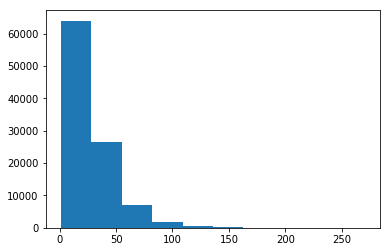

0.0420


In [172]:
plt.hist(results)
plt.show()
print("{:.4f}".format(np.mean(np.array(results) >= 70)))

In [173]:
ans['Q8'] = 1

#### Q9)
with an alternative hypothesis that the die lands on 5 or 6, each with probbility 0.5 (and never lands on [1,4])
what is the __power__ of following Dr.strangelove's procedure and rule of rejection (if the final result is greater or equal to 70)?

report the result of your simulation with percision of up to 2 decimal point (X.xx) round down.

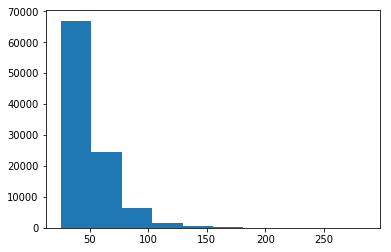

0.1240


In [186]:
results = []
for i in range(n_runs):
    # roll die
    die_roll = np.random.choice(np.arange(5,7))
    beta = (die_roll+1)/2.
    added_value = die_roll*np.random.exponential(beta)
    results.append(added_value + die_roll**2)

plt.hist(results)
plt.show()
print("{:.4f}".format(np.mean(np.array(results) >= 70)))

In [187]:
ans['Q9'] = 0.12

#### Q10)
with the same setting of Q9, what woud be the type 2 error probability

In [188]:
1-0.12

0.88

In [189]:
ans['Q10'] = 0.88

# finish!

to submit your HW please run this last code block and follow the instructions. <BR>
this code will create a CSV file in the current directory on the azure notebooks project <br>
please download it and submit it through moodle

In [190]:
import pandas as pd
df_ans = pd.DataFrame.from_dict(ans, orient='index')
if df_ans.shape[0] == 12:
    df_ans.to_csv('{}_{}.csv'.format(ans['HW'],str(ans['id_number'])))
    print("OK!")
else:
    print("seems like you missed a question, make sure you have run all the code blocks")

OK!
